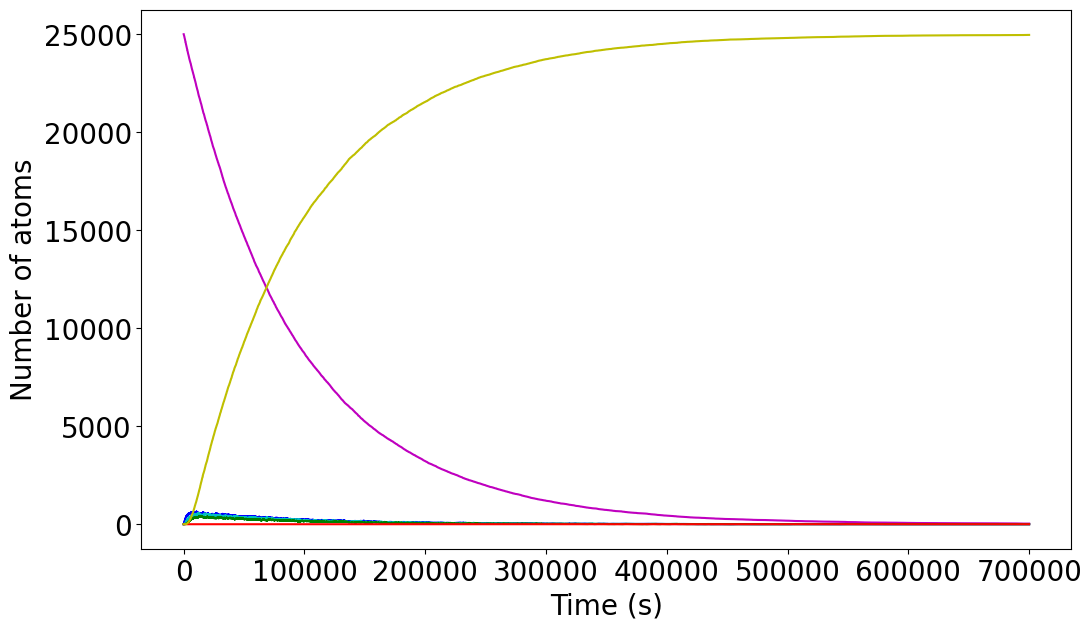

The total amount of a decays is 25045 and the energy generated was 100180 MeV
The total amount of R decays is 49854 and the energy generated was 149562 MeV
The total amount of B decays is 77 and the energy generated was 77 MeV
The total amount of Z decays is 24968 and the energy generated was 174776 MeV


In [2]:
import numpy as np
from numpy import arange
from pylab import plt,xlabel,ylabel,show

# start with constants
NRn = 25000
NPo = 0
NPb_214 = 0
NBi = 0
NTl = 0
NPb_207 = 0

tau_Rn = 0.82*24*60*60
tau_Po = 31*60
tau_Pb = 26.8*60
tau_Bi = 19.9*60
tau_Tl = 1.3*60

h = 1.0

p_Rn = 1 - 2**(-h/tau_Rn)
p_Po = 1 - 2**(-h/tau_Po)
p_Pb_214 = 1 - 2**(-h/tau_Pb)
p_Bi = 1 - 2**(-h/tau_Bi)
p_Tl = 1 - 2**(-h/tau_Tl)

tmax = 700000

# Types of decays
a_decay = 0
a_energy = 0
R_decay = 0
R_energy = 0
B_decay = 0
B_energy = 0
Z_decay = 0
Z_energy = 0


# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Rnpoints = []
Popoints = []
Pb_214points = []
Bipoints = []
Tlpoints = []
Pb_207points = []

# Main loop
for t in tpoints:    # for time 0-200000 sec
    Rnpoints.append(NRn)
    Popoints.append(NPo)
    Pb_214points.append(NPb_214)
    Bipoints.append(NBi)
    Tlpoints.append(NTl)
    Pb_207points.append(NPb_207)

    # Calculate the number of atoms that decay
    decay_Rn = 0
    for i in range(NRn):
        if np.random.random() < p_Rn:
            decay_Rn += 1
            NRn -= decay_Rn # subtract number of decayed Parent atoms 
            NPo += decay_Rn # add number of decayed Daughter atoms 
            Z_decay += decay_Rn # add number of Z decays
    decay_Po = 0
    for i in range(NPo): # determine number of atoms that decay
        if np.random.random() < p_Po:
            decay_Po += 1
            if np.random.random() <= 0.9998:
                NPo -= decay_Po # subtract number of decayed Parent atoms 
                NPb_214 += decay_Po # add number of decayed Daughter atoms
                a_decay += decay_Po
            else:
                NPo -= decay_Po # subtract number of decayed Parent atoms 
                NBi += decay_Po # add number of decayed Daughter atoms
                B_decay += decay_Po
    
    decay_Pb = 0
    for i in range(NPb_214): # determine number of atoms that decay
        if np.random.random() < p_Pb_214:
            decay_Pb += 1
            NPb_214 -= decay_Pb # subtract number of decayed Parent atoms 
            NBi += decay_Pb # add number of decayed Daughter atoms 
            R_decay += decay_Pb

    decay_Bi = 0
    for i in range(NBi): # determine number of atoms that decay
        if np.random.random() < p_Bi:
            decay_Bi += 1
            if np.random.random() <= 0.997:
                NBi -= decay_Bi # subtract number of decayed Parent atoms 
                NPb_207 += decay_Bi # add number of decayed Daughter atoms
                R_decay += decay_Bi
            else:
                NBi -= decay_Bi # subtract number of decayed Parent atoms 
                NTl += decay_Bi # add number of decayed Daughter atoms
                a_decay += decay_Bi

    decay_Tl = 0
    for i in range(NTl): # determine number of atoms that decay
        if np.random.random() < p_Tl:
            decay_Tl += 1
            NTl -= decay_Tl # subtract number of decayed Parent atoms 
            NPb_207 += decay_Tl # add number of decayed Daughter atoms
            B_decay += decay_Tl


#Energy from each decay
a_energy = a_decay * 4
R_energy = R_decay * 3
B_energy = B_decay * 1
Z_energy = Z_decay * 7

# Make the graph
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.plot(tpoints,Rnpoints, c='m') # plot Tl vs. time
ax.plot(tpoints,Popoints, c='b') 
ax.plot(tpoints,Pb_214points, c='c')
ax.plot(tpoints,Bipoints, c='g')
ax.plot(tpoints,Tlpoints, c='r')
ax.plot(tpoints,Pb_207points, c='y')

# add the labels
ax.set_xlabel("Time (s)",size=20)   # allows LaTeX style formating
ax.set_ylabel("Number of atoms",size=20)   # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

# Shows number of decays and their energy
print("The total amount of a decays is", a_decay, "and the energy generated was", a_energy, "MeV")
print("The total amount of R decays is", R_decay, "and the energy generated was", R_energy, "MeV")
print("The total amount of B decays is", B_decay, "and the energy generated was", B_energy, "MeV")
print("The total amount of Z decays is", Z_decay, "and the energy generated was", Z_energy, "MeV")


In [3]:
a_energy_stats = np.array([100260, 100180, 100176, 100136, 100224, 100128, 100140, 100144, 100172, 100160])
R_energy_stats = np.array([149577, 149562, 149628, 149538, 149640, 149673, 149616, 149607, 149616, 149607])
B_energy_stats = np.array([94, 77, 81, 82, 88, 65, 74, 71, 71, 79])
Z_energy_stats = np.array([174846, 174776, 174860, 174762, 174888, 174860, 174811, 174797, 174832, 174825])

In [6]:
total_energy_stats = a_energy_stats + R_energy_stats + B_energy_stats + Z_energy_stats

a_average = np.average(a_energy_stats)
R_average = np.average(R_energy_stats)
B_average = np.average(B_energy_stats)
Z_average = np.average(Z_energy_stats)
total_average = np.average(total_energy_stats)
a_SD = np.std(a_energy_stats)
R_SD = np.std(R_energy_stats)
B_SD = np.std(B_energy_stats)
Z_SD = np.std(Z_energy_stats)
total_SD = np.std(total_energy_stats)

print(a_average)
print(R_average)
print(B_average)
print(Z_average)
print(total_average)
print(a_SD)
print(R_SD)
print(B_SD)
print(Z_SD)
print(total_SD)

100172.0
149606.4
78.2
174825.7
424682.3
39.63836525387998
37.05455437594683
8.158431221748454
37.75460236845304
89.56009155868477


In [ ]:
# cost for materials needed to block all harmfull decays
# $41.74 Dollars for Wood if its just the average, $41.79 for 3SD, and $42.50
# $131.00 or $133.00
# $1.75 or $85.00
# $495.66 or $510.00